# Import libraries

In [44]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim 
import geocoder

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium 

from sklearn.cluster import KMeans

# Scrap data into a DataFrame

In [2]:
url  = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = requests.get(url)
if page.status_code == 200:
    print('Page download successful')
else:
    print('Page download error. Error code: {}'.format(page.status_code))

Page download successful


In [11]:
df_html = pd.read_html(url, header=0, na_values = ['Not assigned'])[0]
df_html.head()

,Postal Code,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Data Preprocessing

In [13]:
df_html["Neighborhood"].shape

(180,)

In [30]:
df_CA = pd.DataFrame( df_html)

In [31]:
df_CA

,Postal Code,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,NaN,NaN
176,M6Z,NaN,NaN
177,M7Z,NaN,NaN
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [32]:
df_CA = df_CA.dropna()

In [33]:
df_CA.shape

(103, 3)

In [34]:
df_CA.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [35]:
df_CA.reset_index(drop=True)

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


# Get the geographical coordinates

In [36]:

url1 = 'http://cocl.us/Geospatial_data'
df_geo = pd.read_csv(url1)
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Add latitute and longitude to the columns

In [37]:
df_CA = df_CA.join(df_geo.set_index('Postal Code'), on='Postal Code')

In [38]:
df_CA

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.753259,-79.329656
3,M4A,North York,Victoria Village,43.725882,-79.315572
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
165,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [39]:
df_CA.reset_index(drop=True)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [41]:
df_CA.to_csv("df_CA.csv", index=False)

## Exploratory analysis

In [42]:

import geocoder
from geopy.geocoders import Nominatim 

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


# Create a map of Toronto with neighborhoods superimposed on top

In [49]:
map_CA = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_CA['Latitude'], df_CA['Longitude'], df_CA['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_CA)  
    
map_CA

In [50]:
map_CA.save('map_CA.html')

# Use the Foursquare API to explore the neighborhoods

Top 100 venues that are within a radius of 1000 meters.

In [62]:
LIMIT = 100
radius = 500

venues = []

for lat, long, neighborhood in zip(df_CA['Latitude'], df_CA['Longitude'], df_CA['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [63]:
venues_df = pd.DataFrame(venues)

venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

venues_df.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [64]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
...,...,...,...,...,...,...
"Willowdale, Willowdale East",33,33,33,33,33,33
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,5,5,5,5,5,5


# Analyze Neighborhood

In [87]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = CA_grouped['Neighborhoods']

for ind in np.arange(CA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Lounge,Breakfast Spot,Latin American Restaurant,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Skating Rink,Dance Studio,Coffee Shop,Pub,Sandwich Place,Gym,American Restaurant,Department Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Sandwich Place,Diner,Middle Eastern Restaurant,Mobile Phone Shop,Supermarket,Deli / Bodega,Ice Cream Shop,Fried Chicken Joint
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Dog Run,Diner,Discount Store,Distribution Center,Doner Restaurant,Dessert Shop
4,"Bedford Park, Lawrence Manor East",Thai Restaurant,Sandwich Place,Italian Restaurant,Restaurant,Coffee Shop,Comfort Food Restaurant,Juice Bar,Butcher,Café,Sushi Restaurant


In [120]:
print (venues_df['VenueCategory'].value_counts())

Coffee Shop               176
Café                      100
Restaurant                 65
Park                       52
Pizza Place                50
                         ... 
Indonesian Restaurant       1
Thrift / Vintage Store      1
Doner Restaurant            1
Kids Store                  1
River                       1
Name: VenueCategory, Length: 260, dtype: int64


In [121]:
# create a dataframe of top 10 categories
venues_df_Top10 = venues_df['VenueCategory'].value_counts()[0:10].to_frame(name='frequency')
venues_df_Top10=venues_df_Top10.reset_index()

venues_df_Top10.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)
venues_df_Top10

,VenueCategory,Frequency
0,Coffee Shop,176
1,Café,100
2,Restaurant,65
3,Park,52
4,Pizza Place,50
5,Hotel,46
6,Italian Restaurant,43
7,Bakery,41
8,Sandwich Place,41
9,Japanese Restaurant,41


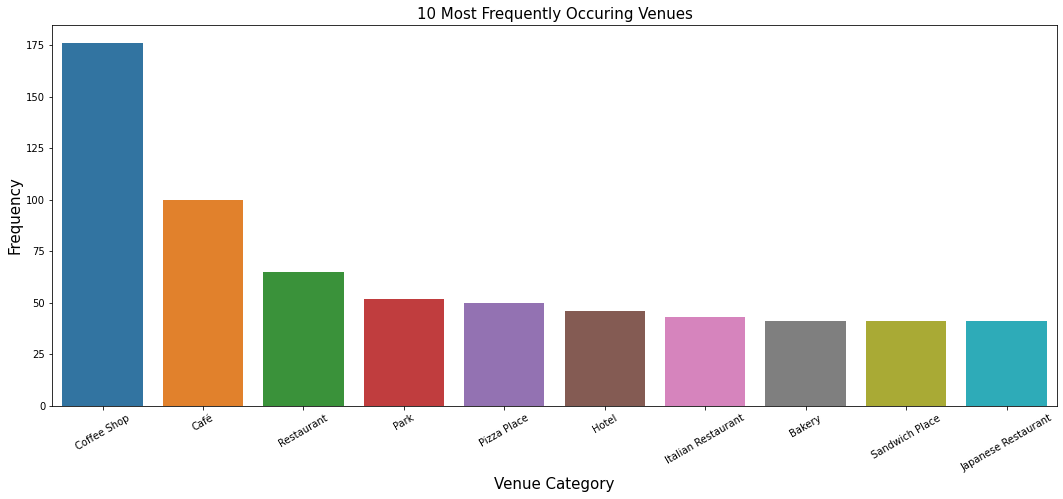

In [123]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=venues_df_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [77]:
CA_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CA_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [CA_onehot.columns[-1]] + list(CA_onehot.columns[:-1])
CA_onehot = CA_onehot[fixed_columns]


CA_onehot.head()

,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
CA_onehot.shape

(2125, 261)

In [176]:
CA_grouped = CA_onehot.groupby(["Neighborhoods"]).mean().reset_index()

In [177]:
CA_grouped.head()

,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Find optimal number of clusters

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [95]:
max_range = 15

CA_grouped_clustering = CA_grouped.drop('Neighborhoods', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = CA_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

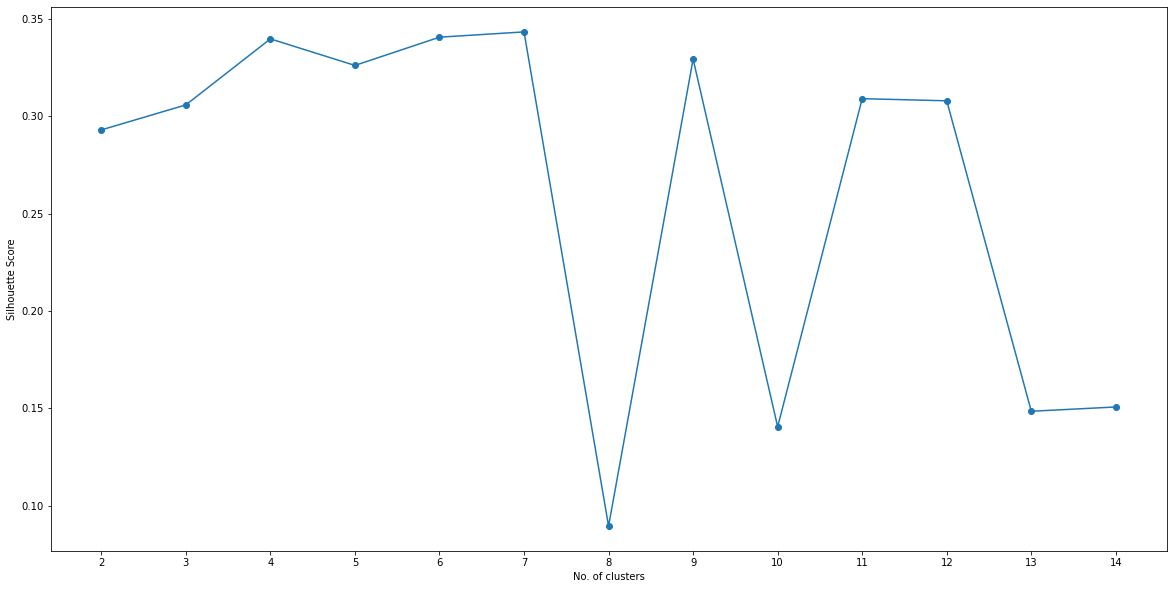

In [96]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [66]:
print((len(venues_df['VenueCategory'].unique())))

260


In [72]:
"Pharmacy" in venues_df['VenueCategory'].unique()

True

In [144]:
array = ["Pharmacy"]
df_phar = venues_df.loc[venues_df['VenueCategory'].isin(array)]

In [145]:
df_phar

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
102,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
248,Woodbine Heights,43.695344,-79.318389,Shoppers Drug Mart,43.699232,-79.319319,Pharmacy
315,St. James Town,43.651494,-79.375418,Rexall,43.648182,-79.373870,Pharmacy
341,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,Shoppers Drug Mart,43.641312,-79.576924,Pharmacy
399,Berczy Park,43.644771,-79.373306,Shoppers Drug Mart,43.647141,-79.370898,Pharmacy
403,Berczy Park,43.644771,-79.373306,Rexall,43.648182,-79.373870,Pharmacy
568,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Shoppers Drug Mart,43.756239,-79.439599,Pharmacy
577,Thorncliffe Park,43.705369,-79.349372,Shoppers Drug Mart,43.705810,-79.347044,Pharmacy
697,"Dufferin, Dovercourt Village",43.669005,-79.442259,Rexall,43.667504,-79.442086,Pharmacy
698,"Dufferin, Dovercourt Village",43.669005,-79.442259,Shoppers Drug Mart,43.666745,-79.447446,Pharmacy


# There are primarily 2 venues: Rexall and Shoppers Drug Mart

In [155]:
venues_df_phar = df_phar['VenueName'].value_counts().to_frame(name='frequency')

venues_df_phar.rename(index=str, columns={ "frequency": "Frequency"}, inplace=True)
venues_df_phar

,Frequency
Shoppers Drug Mart,18
Rexall,7


In [178]:
df_pharmacy = CA_grouped[["Neighborhoods","Pharmacy"]]

In [179]:
df_pharmacy

,Neighborhoods,Pharmacy
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.111111
2,"Bathurst Manor, Wilson Heights, Downsview North",0.052632
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.040000
...,...,...
90,"Willowdale, Willowdale East",0.000000
91,"Willowdale, Willowdale West",0.166667
92,Woburn,0.000000
93,Woodbine Heights,0.142857


In [98]:
max_range = 15


CA_grouped_clustering = df_pharmacy.drop('Neighborhoods', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = CA_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

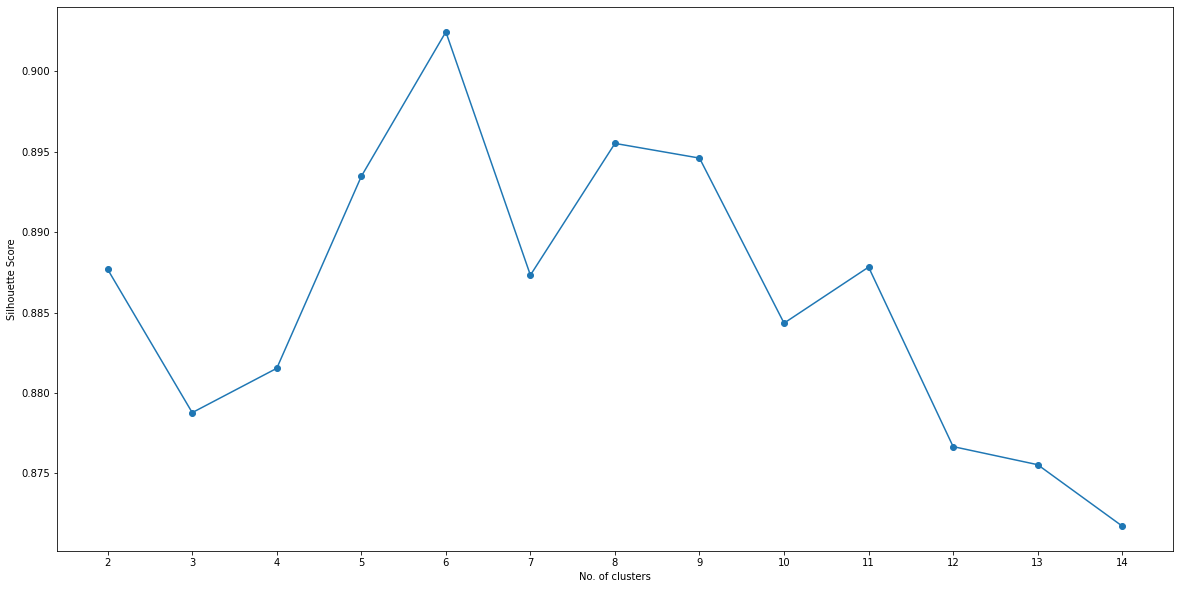

In [99]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")


<b>Based on this graph, we can see that the optimal number of clusters is 6</b>

Now let's run the K-means clustering with the optimal number of clusters, which is 6.

In [180]:
# run k-means clustering

kmeans = KMeans(n_clusters=6, random_state=0).fit(CA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 3, 0, 3, 3, 0, 0, 0, 0])

In [182]:
CA_merged = df_pharmacy.copy()

CA_merged["Cluster Labels"] = kmeans.labels_

In [183]:
CA_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
CA_merged.head()

,Neighborhood,Pharmacy,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.111111,1
2,"Bathurst Manor, Wilson Heights, Downsview North",0.052632,3
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.040000,3


In [184]:
CA_merged = CA_merged.join(df_CA.set_index("Neighborhood"), on="Neighborhood")
CA_merged.head()

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
0,Agincourt,0.000000,0,M1S,Scarborough,43.794200,-79.262029
1,"Alderwood, Long Branch",0.111111,1,M8W,Etobicoke,43.602414,-79.543484
2,"Bathurst Manor, Wilson Heights, Downsview North",0.052632,3,M3H,North York,43.754328,-79.442259
3,Bayview Village,0.000000,0,M2K,North York,43.786947,-79.385975
4,"Bedford Park, Lawrence Manor East",0.040000,3,M5M,North York,43.733283,-79.419750


In [185]:
CA_merged.to_csv("df_CA_merged.csv", index=False)

In [186]:
CA_merged.sort_values(["Cluster Labels"], inplace=True)
CA_merged

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
0,Agincourt,0.000000,0,M1S,Scarborough,43.794200,-79.262029
62,"Queen's Park, Ontario Provincial Government",0.000000,0,M7A,Downtown Toronto,43.662301,-79.389494
61,Parkwoods,0.000000,0,M3A,North York,43.753259,-79.329656
59,"Parkdale, Roncesvalles",0.000000,0,M6R,West Toronto,43.648960,-79.456325
58,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.000000,0,M8Y,Etobicoke,43.636258,-79.498509
...,...,...,...,...,...,...,...
72,St. James Town,0.011905,4,M5C,Downtown Toronto,43.651494,-79.375418
43,"Kensington Market, Chinatown, Grange Park",0.015385,4,M5T,Downtown Toronto,43.653206,-79.400049
28,"Fairview, Henry Farm, Oriole",0.016129,4,M2J,North York,43.778517,-79.346556
53,"New Toronto, Mimico South, Humber Bay Shores",0.076923,5,M8V,Etobicoke,43.605647,-79.501321


In [187]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
print (kclusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CA_merged['Latitude'], CA_merged['Longitude'], CA_merged['Neighborhood'], CA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
       
map_clusters

6


In [205]:
map_clusters.save('map_CA_Pharmacy.html')

# Insights and Cluster analysis

In [200]:
No_Pharmacy = CA_merged.loc[CA_merged['Cluster Labels'] == 0]

In [201]:
No_Pharmacy

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
0,Agincourt,0.0,0,M1S,Scarborough,43.794200,-79.262029
62,"Queen's Park, Ontario Provincial Government",0.0,0,M7A,Downtown Toronto,43.662301,-79.389494
61,Parkwoods,0.0,0,M3A,North York,43.753259,-79.329656
59,"Parkdale, Roncesvalles",0.0,0,M6R,West Toronto,43.648960,-79.456325
58,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0.0,0,M8Y,Etobicoke,43.636258,-79.498509
...,...,...,...,...,...,...,...
94,York Mills West,0.0,0,M2P,North York,43.752758,-79.400049
24,Downsview,0.0,0,M3L,North York,43.739015,-79.506944
24,Downsview,0.0,0,M3M,North York,43.728496,-79.495697
26,"East Toronto, Broadview North (Old East York)",0.0,0,M4J,East York,43.685347,-79.338106


In [203]:
No_Pharmacy_freq = No_Pharmacy["Borough"].value_counts().to_frame(name='frequency')

No_Pharmacy_freq.rename(index=str, columns={ "frequency": "Frequency"}, inplace=True)
No_Pharmacy_freq


,Frequency
North York,18
Downtown Toronto,14
Scarborough,14
Central Toronto,7
Etobicoke,7
York,5
East Toronto,5
West Toronto,5
East York,2
Mississauga,1


In [199]:
len(CA_merged[CA_merged["Pharmacy"]>0])

21

In [189]:
CA_merged.loc[CA_merged['Cluster Labels'] == 1]

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
60,"Parkview Hill, Woodbine Gardens",0.090909,1,M4B,East York,43.706397,-79.309937
71,"South Steeles, Silverstone, Humbergate, Jamest...",0.100000,1,M9V,Etobicoke,43.739416,-79.588437
1,"Alderwood, Long Branch",0.111111,1,M8W,Etobicoke,43.602414,-79.543484


In [190]:
CA_merged.loc[CA_merged['Cluster Labels'] == 2]

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
91,"Willowdale, Willowdale West",0.166667,2,M2R,North York,43.782736,-79.442259
27,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",0.142857,2,M9C,Etobicoke,43.643515,-79.577201
25,"Dufferin, Dovercourt Village",0.133333,2,M6H,West Toronto,43.669005,-79.442259
16,"Clarks Corners, Tam O'Shanter, Sullivan",0.153846,2,M1T,Scarborough,43.781638,-79.304302
93,Woodbine Heights,0.142857,2,M4C,East York,43.695344,-79.318389


In [191]:
CA_merged.loc[CA_merged['Cluster Labels'] == 3]

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
2,"Bathurst Manor, Wilson Heights, Downsview North",0.052632,3,M3H,North York,43.754328,-79.442259
4,"Bedford Park, Lawrence Manor East",0.040000,3,M5M,North York,43.733283,-79.419750
5,Berczy Park,0.035088,3,M5E,Downtown Toronto,43.644771,-79.373306
82,Thorncliffe Park,0.050000,3,M4H,East York,43.705369,-79.349372
78,"The Annex, North Midtown, Yorkville",0.047619,3,M5R,Central Toronto,43.672710,-79.405678


In [192]:
CA_merged.loc[CA_merged['Cluster Labels'] == 4]

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
19,Davisville,0.029412,4,M4S,Central Toronto,43.704324,-79.388790
75,Stn A PO Boxes,0.020619,4,M5W,Downtown Toronto,43.646435,-79.374846
73,"St. James Town, Cabbagetown",0.021277,4,M4X,Downtown Toronto,43.667967,-79.367675
72,St. James Town,0.011905,4,M5C,Downtown Toronto,43.651494,-79.375418
43,"Kensington Market, Chinatown, Grange Park",0.015385,4,M5T,Downtown Toronto,43.653206,-79.400049
28,"Fairview, Henry Farm, Oriole",0.016129,4,M2J,North York,43.778517,-79.346556


In [193]:
CA_merged.loc[CA_merged['Cluster Labels'] == 5]

,Neighborhood,Pharmacy,Cluster Labels,Postal Code,Borough,Latitude,Longitude
53,"New Toronto, Mimico South, Humber Bay Shores",0.076923,5,M8V,Etobicoke,43.605647,-79.501321
74,"Steeles West, L'Amoreaux West",0.066667,5,M1W,Scarborough,43.799525,-79.318389


### Observations¶
Most of the Pharmacies are in Cluster 4 which is in the central area of Toronto and Downtown Toronto. Looking at nearby venues, it seems Cluster 4 and Cluster 5 might be a good location as there is a lot of traffic in these areas. People travel through these areas regularly. 

By looking at the cluster data, we can see that cluster 0 is the one that we are the most interested in (where there are no pharmacies) to find the best location for a new one. One of the main factors to look out while opening a pharmacy is refilling medical supplies and population density. There are nearby businesses, such as medical offices, that will provide a constant flow (medical refills) of potential customers. 

Therefore, based on these findings it is recommended to open a pharmacy in locations closer to downtown Toronto, Etobicoke, and Scarborough with little competition.  
